In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.graph_objs as go
from plotly.offline import iplot
from sqlalchemy import create_engine
import string

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
from wordcloud import WordCloud , STOPWORDS

In [7]:
pip install emoji==2.2.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
from collections import Counter

In [9]:
import os

In [10]:
files = os.listdir(r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Youtube')

In [11]:
files

['IN_category_id.json',
 'MXvideos.csv',
 'Youtube dataset.ipynb',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'youtube_analysis_shan_singh.ipynb',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 '.ipynb_checkpoints',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv',
 'UScomments.csv']

In [12]:
comments = pd.read_csv(r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Youtube/UScomments.csv', error_bad_lines= False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [13]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [14]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [15]:
comments

video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691395       0  
691396       0  
691397       0  
691398       0  
691399       0  

[691400 rows x 4 columns]

In [16]:
comments.dropna(inplace=True)
comments

video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691395       0  
691396       0  
691397       0  
691398       0  
691399       0  

[691375 rows x 4 columns]

In [17]:
comments.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
691395     True
691396     True
691397     True
691398    False
691399     True
Length: 691375, dtype: bool

In [18]:
comments.drop_duplicates(inplace=True)
comments

video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691359  EoejGgUNmVU     Lost on you ! 😍\nOH My God I love this song !😭     0   
691366  EoejGgUNmVU                                      I  LOVE  LP❤️     0   
691392  EoejGgUNmVU                              *L O S T  O N  Y O U*     1   
691393  EoejGgUNmVU                                                 <3     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691359       0  
691366       0  
691392       0  
691393       0  
691398       0  

[478692 rows x 4 columns]

Sentiment

In [19]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [20]:
polarity = []

for i in comments['comment_text']:
    try:
        polarity.append(TextBlob("i").sentiment.polarity)
    except:
        polarity.append(0)

In [21]:
len(polarity)

478692

In [22]:
comments['polarity']= polarity

In [23]:
comments

video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691359  EoejGgUNmVU     Lost on you ! 😍\nOH My God I love this song !😭     0   
691366  EoejGgUNmVU                                      I  LOVE  LP❤️     0   
691392  EoejGgUNmVU                              *L O S T  O N  Y O U*     1   
691393  EoejGgUNmVU                                                 <3     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   

       replies  polarity  
0            0       0.0  
1            0       0.0  
2            0       0.0  
3            0       0.0  
4            0       0.0  
...        ...       ...  
691359       0       0.0  
691366       0       0.0  
691392       0       0.0  
691393       0       0.0  
691398       0       0.0  

[478692 rows x 5 columns]

In [24]:
comments['polarity'].isnull().count()

478692

In [25]:
#looks like textblob is not working due to emojis probably as all values are null.

# Check above with NLP

# World Cloud Analysis

In [26]:
filter1 = comments['polarity'] == 1

In [27]:
pos_comm = comments[filter1]
pos_comm

Empty DataFrame
Columns: [video_id, comment_text, likes, replies, polarity]
Index: []

In [28]:
filter2 = comments['polarity'] == -1

In [29]:
neg_comm = comments[filter2]
neg_comm

Empty DataFrame
Columns: [video_id, comment_text, likes, replies, polarity]
Index: []

In [30]:
# no not working

In [31]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [32]:
total_comm_pos = ' '.join(comments['comment_text'])

In [33]:
word_cloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comm_pos)
word_cloud

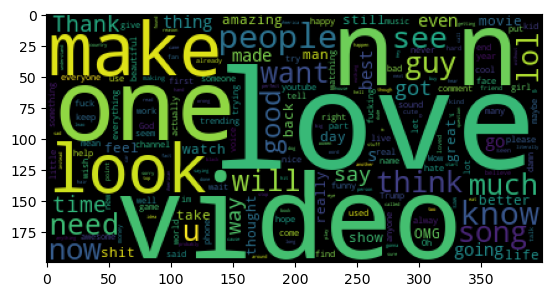

In [34]:
plt.imshow(word_cloud)

(-0.5, 399.5, 199.5, -0.5)

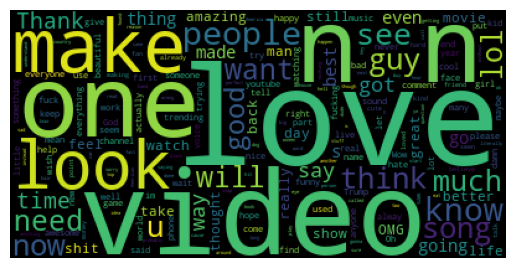

In [35]:
plt.imshow(word_cloud)
plt.axis('off')

In [36]:
#I rather did all words as positive since the polarity somehow didnt work.

In [37]:
import emoji

In [38]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [39]:
comment = 'trending 😉'

In [40]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [41]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [42]:
emoji_list

['😉']

In [43]:
#only emoji comments without text
all_emoji_list = []

for comment in comments['comment_text']:
    if comment in emoji.EMOJI_DATA:
        all_emoji_list.append(comment) 

In [44]:
all_emoji_list

['👍',
 '❤️',
 '😂',
 '❤️',
 '💄',
 '🖤',
 '💕',
 '😒',
 '👎🏽',
 '🐘',
 '💕',
 '😎',
 '🇺🇸',
 '🙏',
 '🇺🇸',
 '🌞',
 '💜',
 '😱',
 '💕',
 '🎈',
 '👍',
 '😕',
 '😻',
 '💄',
 '💦',
 '❤️',
 '❤',
 '😅',
 '💜',
 '🤴🏻',
 '😍',
 '💯',
 '❤',
 '😑',
 '💖',
 '❤',
 '🙏🏽',
 '♥️',
 '😂',
 '😭',
 '💛',
 '😝',
 '😍',
 '❤',
 '😍',
 '💝',
 '👌',
 '🌞',
 '✌🏻',
 '😂',
 '😴',
 '👍',
 '👍',
 '👍',
 '❤',
 '👍',
 '🔥',
 '💯',
 '🐍',
 '😍',
 '👍',
 '😂',
 '👍',
 '❤',
 '💩',
 '😍',
 '👍',
 '💞',
 '😻',
 '♥',
 '😂',
 '😃',
 '👍',
 '🤘🏾',
 '👍',
 '🙄',
 '😂',
 '👍',
 '👍',
 '🎢',
 '❤️',
 '👍🏾',
 '😂',
 '😍',
 '❤',
 '❤',
 '👌',
 '🤢',
 '❤️',
 '😍',
 '🤗',
 '😢',
 '👍',
 '🔥',
 '👑',
 '❤',
 '😂',
 '😀',
 '👌',
 '😍',
 '🤦🏾\u200d♂️',
 '💋',
 '👋',
 '❤',
 '😍',
 '❤️',
 '❤',
 '💚',
 '♥',
 '👍',
 '🖤',
 '💚',
 '❤️',
 '💿',
 '❤️',
 '🥀',
 '👁',
 '😀',
 '😂',
 '🇩🇴',
 '❤',
 '❣️',
 '🔥',
 '🔥',
 '❤',
 '❤',
 '💛',
 '👌🏾',
 '👍',
 '💚',
 '❤️',
 '👍',
 '💖',
 '👍',
 '😇',
 '👍',
 '🙌',
 '😄',
 '💕',
 '❤',
 '👍',
 '😎',
 '😛',
 '💯',
 '✌',
 '❤',
 '😱',
 '💖',
 '😂',
 '😂',
 '❤',
 '❤',
 '🎈',
 '🔥',
 '👑',
 '😳',
 '❤',
 '💓',
 '💛',
 '🎈',
 '💟',
 '🔥'

In [45]:
from collections import Counter

In [46]:
Counter(all_emoji_list).most_common(10)

[('❤️', 93),
 ('❤', 90),
 ('😍', 73),
 ('👍', 69),
 ('😂', 57),
 ('💖', 25),
 ('♥', 24),
 ('🔥', 21),
 ('💕', 17),
 ('💜', 17)]

In [47]:
len(all_emoji_list)

983

In [48]:
#all emojis used in all comments

all_emojiss_list = []

for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojiss_list.append(char) 

In [49]:
len(all_emojiss_list)

213868

In [50]:
Counter(all_emojiss_list).most_common(10)

[('😂', 27287),
 ('❤', 22180),
 ('😍', 22145),
 ('🔥', 6288),
 ('😭', 6155),
 ('💖', 4242),
 ('😘', 4174),
 ('👏', 4005),
 ('👍', 3789),
 ('💕', 3731)]

In [51]:
Counter(all_emojiss_list).most_common(10)[2]

('😍', 22145)

In [52]:
Counter(all_emojiss_list).most_common(10)[2][0]

'😍'

In [53]:
#only most 10 emojis
emojis = [Counter(all_emojiss_list).most_common(10)[i][0] for i in range (0,10)]

In [54]:
emojis

['😂', '❤', '😍', '🔥', '😭', '💖', '😘', '👏', '👍', '💕']

In [55]:
Counter(all_emojiss_list).most_common(10)[0][1]

27287

In [56]:
freq_emojis = [Counter(all_emojiss_list).most_common(10)[i][1] for i in range (0,10)]

In [57]:
freq_emojis

[27287, 22180, 22145, 6288, 6155, 4242, 4174, 4005, 3789, 3731]

In [58]:
trace = go.Bar(x=emojis, y=freq_emojis)

In [59]:
iplot([trace])

collecting all data

In [60]:
csv_files = [file for file in files if '.csv' in file]

In [61]:
csv_files

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv',
 'UScomments.csv']

In [62]:
csv_files.remove('UScomments.csv')

In [63]:
all_df = pd.DataFrame()
path = r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Youtube'

for file in csv_files:
    current_df = pd.read_csv(path+'/'+file, encoding = 'iso-8859-1', error_bad_lines = False )
    all_df = pd.concat([all_df, current_df], ignore_index = True)

In [64]:
all_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Disfruta la presencia del Chef Torreblanca en ...  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...  
2  La canciÃ³n del principio se llama âEste esp...  
3  El video es de un Walmart en el pais centroame...  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...

In [65]:
all_df.shape

(375942, 16)

# Work with the all_df above

In [66]:
all_df = all_df.drop_duplicates()

In [67]:
all_df.shape

(339525, 16)

# finding the category names in all_df

In [68]:
files = os.listdir(r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Youtube')

In [69]:
files

['IN_category_id.json',
 'MXvideos.csv',
 'Youtube dataset.ipynb',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'youtube_analysis_shan_singh.ipynb',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 '.ipynb_checkpoints',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv',
 'UScomments.csv']

In [70]:
us_json_df = pd.read_json(r'/Users/ilkaymueller/Documents/GitHub/Data_Analysis_Projects/Youtube/US_category_id.json')

In [71]:
us_json_df

kind  \
0   youtube#videoCategoryListResponse   
1   youtube#videoCategoryListResponse   
2   youtube#videoCategoryListResponse   
3   youtube#videoCategoryListResponse   
4   youtube#videoCategoryListResponse   
5   youtube#videoCategoryListResponse   
6   youtube#videoCategoryListResponse   
7   youtube#videoCategoryListResponse   
8   youtube#videoCategoryListResponse   
9   youtube#videoCategoryListResponse   
10  youtube#videoCategoryListResponse   
11  youtube#videoCategoryListResponse   
12  youtube#videoCategoryListResponse   
13  youtube#videoCategoryListResponse   
14  youtube#videoCategoryListResponse   
15  youtube#videoCategoryListResponse   
16  youtube#videoCategoryListResponse   
17  youtube#videoCategoryListResponse   
18  youtube#videoCategoryListResponse   
19  youtube#videoCategoryListResponse   
20  youtube#videoCategoryListResponse   
21  youtube#videoCategoryListResponse   
22  youtube#videoCategoryListResponse   
23  youtube#videoCategoryListResponse   
24  youtube#videoCategoryListResponse   
25  youtube#videoCategoryListResponse   
26  youtube#videoCategoryListResponse   
27  youtube#videoCategoryListResponse   
28  youtube#videoCategoryListResponse   
29  youtube#videoCategoryListResponse   
30  youtube#videoCategoryListResponse   
31  youtube#videoCategoryListResponse   

                                                 etag  \
0   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
5   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
6   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
7   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
8   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
9   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
10  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
11  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
12  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
13  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
14  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
15  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
16  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
17  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
18  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
19  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
20  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
21  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
22  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
23  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
24  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
25  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
26  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
27  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
28  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
29  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
30  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
31  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                                items  
0   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
5   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
6   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
7   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
8   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
9   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
10  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
11  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
12  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
13  {'kind': 

In [72]:
us_json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [73]:
cat_dict = {}

for item in us_json_df['items']:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [74]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [75]:
all_df['category_name'] = all_df['category_id'].map(cat_dict)

In [76]:
all_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description    category_name  
0  Disfruta la presencia del Chef Torreblanca en ...    Entertainment  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   People & Blogs  
2  La canciÃ³n del principio se llama âEste esp...  News & Politics  
3  El video es de un Walmart en el pais centroame...  News & Politics  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...    Howto & Style

lets find which category has max likes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

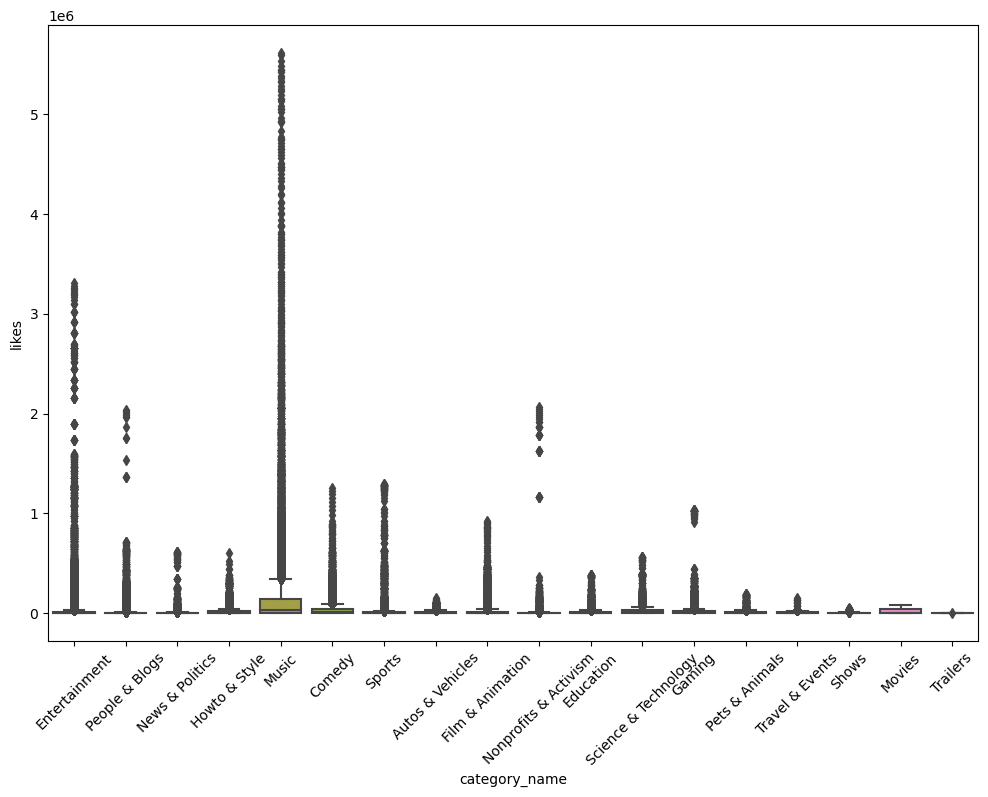

In [77]:
plt.figure(figsize =(12,8))
sns.boxplot(x = 'category_name', y = 'likes', data = all_df)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

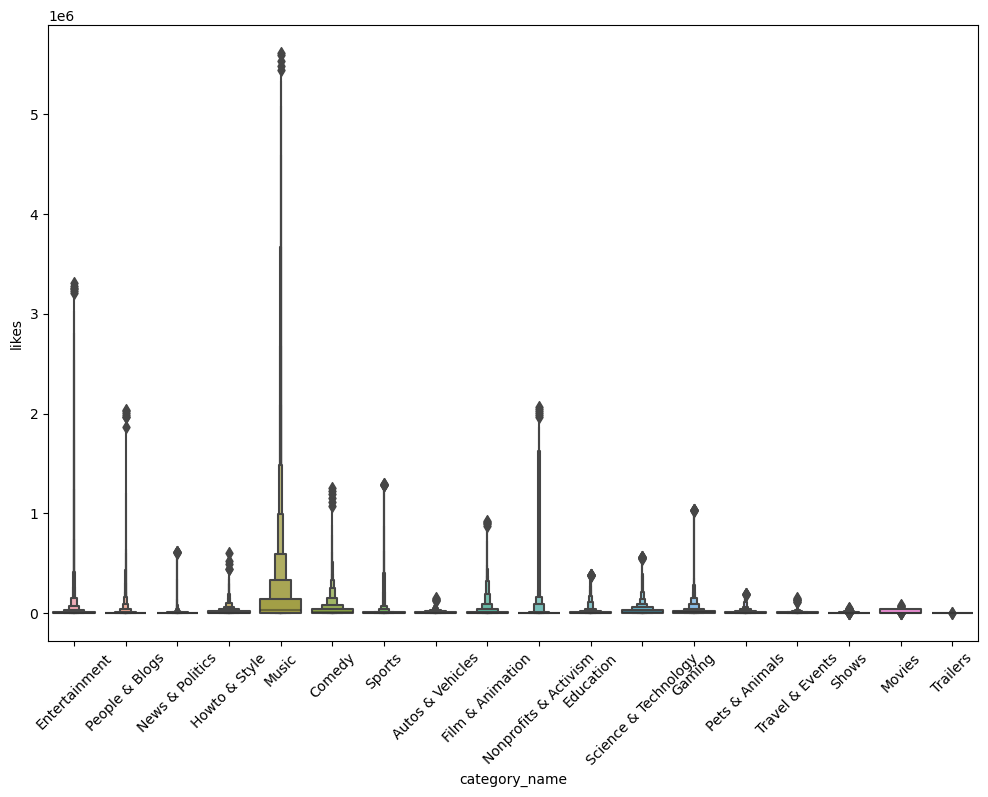

In [78]:
plt.figure(figsize =(12,8))
sns.boxenplot(x = 'category_name', y = 'likes', data = all_df)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

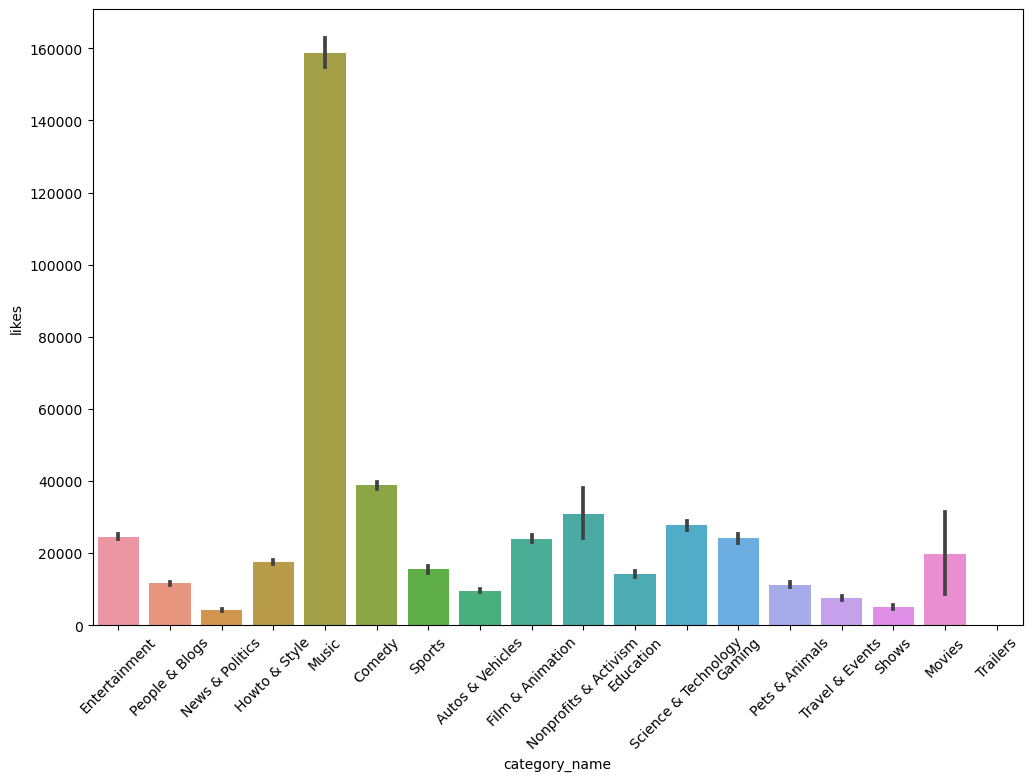

In [79]:
plt.figure(figsize =(12,8))
sns.barplot(x = 'category_name', y = 'likes', data = all_df)
plt.xticks(rotation = 45)

In [80]:
#barplot looks the best, will remove the ci, confidence interval from the plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

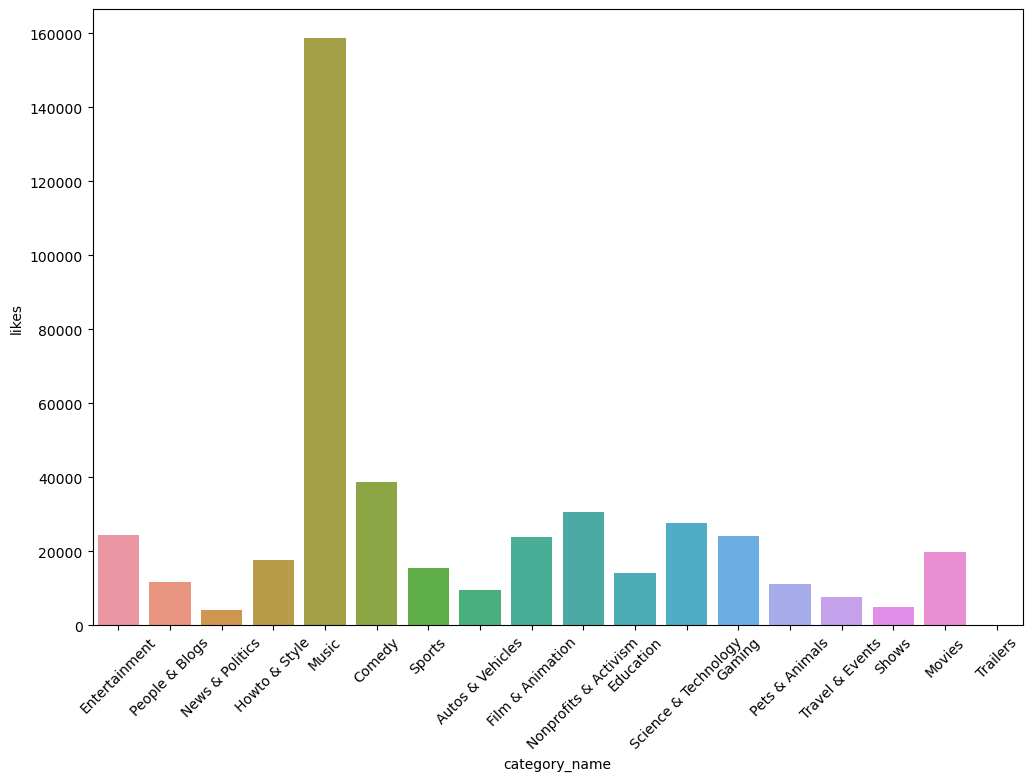

In [81]:
plt.figure(figsize =(12,8))
sns.barplot(x = 'category_name', y = 'likes', data = all_df, ci = None)
plt.xticks(rotation = 45)

In [82]:
all_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description    category_name  
0  Disfruta la presencia del Chef Torreblanca en ...    Entertainment  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   People & Blogs  
2  La canciÃ³n del principio se llama âEste esp...  News & Politics  
3  El video es de un Walmart en el pais centroame...  News & Politics  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...    Howto & Style

In [83]:
#like rate
all_df['like_rate'] = (all_df['likes']/all_df['views'])*100

In [84]:
all_df['dislike_rate'] = (all_df['dislikes']/all_df['views'])*100

In [85]:
all_df['comment_rate'] = (all_df['comment_count']/all_df['views'])*100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

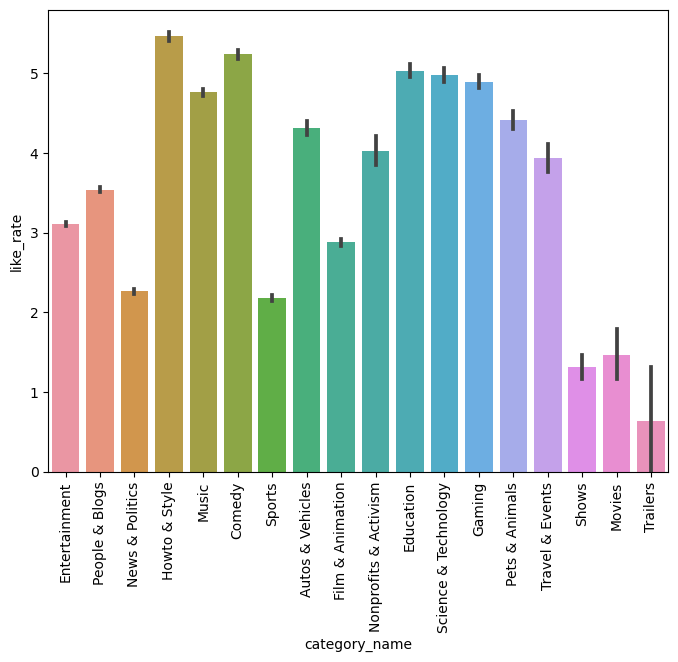

In [86]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'category_name', y = 'like_rate', data= all_df)
plt.xticks(rotation = 'vertical')

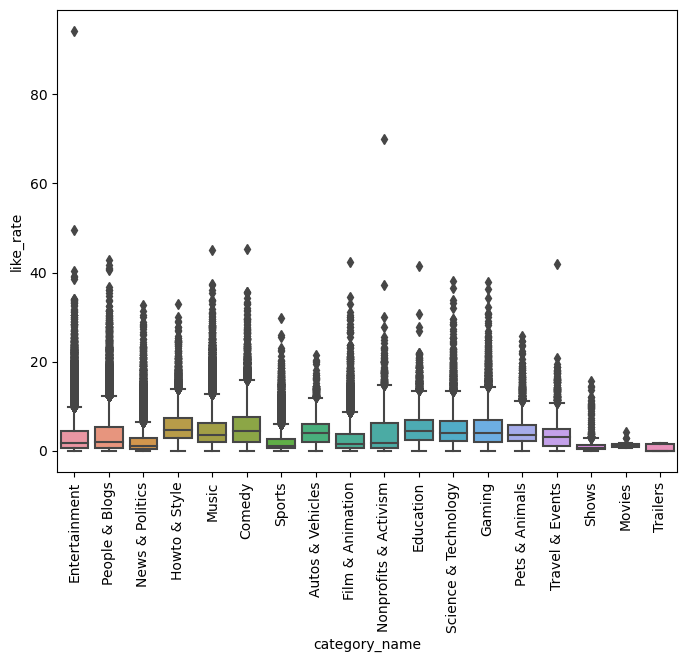

In [87]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'category_name', y = 'like_rate', data= all_df)
plt.xticks(rotation = 'vertical')
plt.show()

In [88]:
like_rate= all_df['like_rate']

In [89]:
'''
sns.set_style("dark")
plt.figure(figsize=(12,12))

#Creating a customized color palette for custom hue according to height of bars
vals = like_rate.to_numpy().ravel()  #to_numpy:make it array, ravel: dim reduction
normalized = (vals - np.min(vals)) / (np.max(vals) - np.min(vals)) #like minmaxscaler from ml
indices = np.round(normalized * (len(vals) - 1)).astype(np.int32) #round already makes int
#int32 for less space
palette = sns.color_palette('Reds', len(vals))
colorPal = np.array(palette).take(indices, axis=0)

#Creating a bar plot
ax=sns.barplot(x = like_rate.index,y= vals,palette=colorPal)
plt.ylabel('Like rate')
plt.title('Total Rides by week day in July 2014 at NYC')
for rect in ax.patches:  #rect as rectangle, ax.patches get every rectangle, aka patches
    ax.text(rect.get_x() + rect.get_width()/2.0,rect.get_height(),int(rect.get_height()), ha='center', va='bottom')
#last line is how func is in documentation, basically calculates and shows as text
#little tricky to write it from mind, I find plotly 10 times better 
'''
#took so long, will run later

'\nsns.set_style("dark")\nplt.figure(figsize=(12,12))\n\n#Creating a customized color palette for custom hue according to height of bars\nvals = like_rate.to_numpy().ravel()  #to_numpy:make it array, ravel: dim reduction\nnormalized = (vals - np.min(vals)) / (np.max(vals) - np.min(vals)) #like minmaxscaler from ml\nindices = np.round(normalized * (len(vals) - 1)).astype(np.int32) #round already makes int\n#int32 for less space\npalette = sns.color_palette(\'Reds\', len(vals))\ncolorPal = np.array(palette).take(indices, axis=0)\n\n#Creating a bar plot\nax=sns.barplot(x = like_rate.index,y= vals,palette=colorPal)\nplt.ylabel(\'Like rate\')\nplt.title(\'Total Rides by week day in July 2014 at NYC\')\nfor rect in ax.patches:  #rect as rectangle, ax.patches get every rectangle, aka patches\n    ax.text(rect.get_x() + rect.get_width()/2.0,rect.get_height(),int(rect.get_height()), ha=\'center\', va=\'bottom\')\n#last line is how func is in documentation, basically calculates and shows as text

<AxesSubplot:xlabel='views', ylabel='likes'>

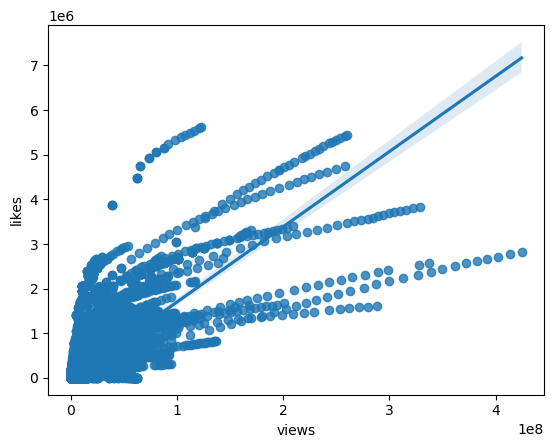

In [90]:
sns.regplot(x='views', y= 'likes', data = all_df)

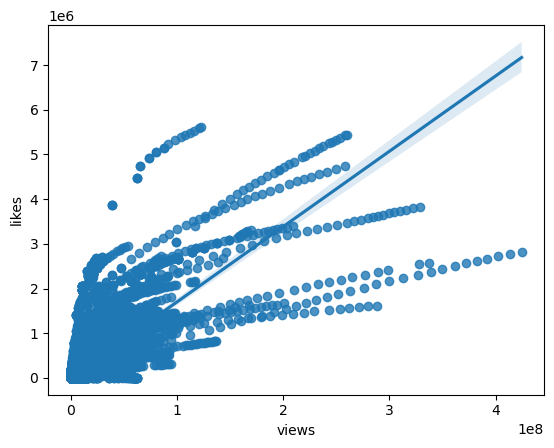

In [91]:
sns.regplot(x='views', y= 'likes', data = all_df)
plt.show()

In [92]:
all_df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.779531  0.405428
likes     0.779531  1.000000  0.451809
dislikes  0.405428  0.451809  1.000000

<AxesSubplot:>

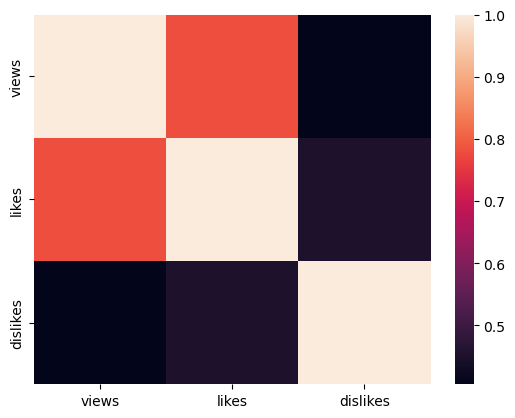

In [93]:
sns.heatmap(all_df[['views','likes','dislikes']].corr())

<AxesSubplot:>

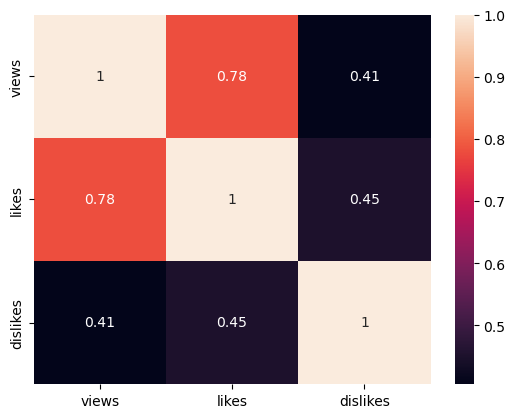

In [94]:
sns.heatmap(all_df[['views','likes','dislikes']].corr(), annot = True)

In [95]:
all_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description    category_name  \
0  Disfruta la presencia del Chef Torreblanca en ...    Entertainment   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   People & Blogs   
2  La canciÃ³n del principio se llama âEste esp...  News & Politics   
3  El video es de un Walmart en el pais centroame...  News & Politics   
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...    Howto & Style   

   like_rate  dislike_rate  comment_rate  
0   1.348467      0.116403      0.592010  
1   0.258164      0.165758      0.351522  
2   7.426652      0.195496      0.446114  
3   0.393123      0.177842      0.216322  
4  11.557009      0.136210      1.485704

In [96]:
all_df['channel_title'].count()

339525

In [97]:
most_videos = all_df.groupby(['channel_title']).size().sort_values(ascending= False) #.reset_index()

In [98]:
most_videos

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Kd Malts                                1
Zedan TV                                1
Kc Kelly - Rocketprenuer                1
Kbaby                                   1
Pavel Sidorik TV                        1
Length: 37824, dtype: int64

In [99]:
most_videos = all_df.groupby(['channel_title']).size().sort_values(ascending= False).reset_index()

In [100]:
most_videos

channel_title    0
0      The Late Show with Stephen Colbert  710
1                                     WWE  643
2             Late Night with Seth Meyers  592
3                            TheEllenShow  555
4                       Jimmy Kimmel Live  528
...                                   ...  ...
37819                            Kd Malts    1
37820                            Zedan TV    1
37821            Kc Kelly - Rocketprenuer    1
37822                               Kbaby    1
37823                    Pavel Sidorik TV    1

[37824 rows x 2 columns]

In [101]:
most_videos = most_videos.rename(columns={0:'total_videos'})
most_videos

channel_title  total_videos
0      The Late Show with Stephen Colbert           710
1                                     WWE           643
2             Late Night with Seth Meyers           592
3                            TheEllenShow           555
4                       Jimmy Kimmel Live           528
...                                   ...           ...
37819                            Kd Malts             1
37820                            Zedan TV             1
37821            Kc Kelly - Rocketprenuer             1
37822                               Kbaby             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

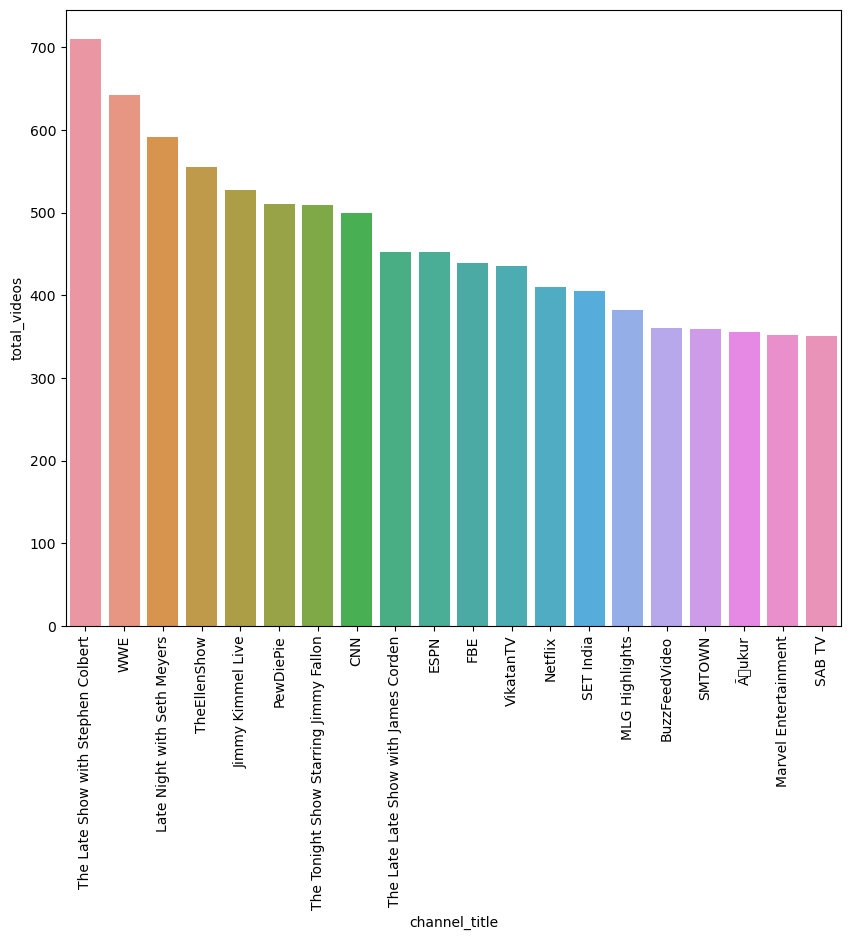

In [104]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'channel_title', y= 'total_videos', data = most_videos[0:20], ci =None)
plt.xticks(rotation='vertical')
plt.show()

In [105]:
import plotly.express as px

In [106]:
px.bar(data_frame = most_videos[0:20], x= 'channel_title', y= 'total_videos')

How related the punctuation in title and likes?

In [107]:
import string

In [108]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [109]:
all_df['title'][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

In [113]:
[char for char in all_df['title'][0] if char in string.punctuation]

['|']

In [114]:
all_df['title'][15]

'TERREMOTO 7,2 SACUDE IRAK E IRÃ\x81N 12.11.17 PRIMERAS IMÃ\x81GENES'

In [115]:
[char for char in all_df['title'][15] if char in string.punctuation]

[',', '.', '.']

In [117]:
len([char for char in all_df['title'][15] if char in string.punctuation])

3

In [119]:
def punc_count(text):
     return len([char for char in text if char in string.punctuation])

In [120]:
sample_count = all_df[0:1000]

In [122]:
sample_count['punc_coun'] = sample_count['title'].apply(punc_count)

In [123]:
sample_count

video_id trending_date  \
0    SbOwzAl9ZfQ      17.14.11   
1    klOV6Xh-DnI      17.14.11   
2    6L2ZF7Qzsbk      17.14.11   
3    hcY52MFWMDM      17.14.11   
4    _OXDcGPVAa4      17.14.11   
..           ...           ...   
995  d4OlDh-WkTg      17.18.11   
996  ea9Byabk7M0      17.18.11   
997  7Oa2aC1E3H4      17.18.11   
998  iGoLto7A-E8      17.18.11   
999  cjin9tPE21s      17.18.11   

                                                 title  \
0                       CapÃ­tulo 12 | MasterChef 2017   
1    ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2             LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3     Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4             DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   
..                                                 ...   
995  [FULL] BTS (ë°©íìë
ë¨) - INTERVIEW With ...   
996  El HÃ¡bito que Diferencia entre Crear Fortuna ...   
997  Reggaeton Mix Noviembre ,Maluma , J Balvin ,Sh...   
998  ÃZIL AL BARÃA SI COUTINHO FALLA| CRISTIANO: ...   
999  6 Outfits Casuales Con Jeans ð Como Combina...   

                       channel_title  category_id              publish_time  \
0                    MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1           Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2          El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                           Casanare           25  2017-11-13T03:47:10.000Z   
4                              Musas           26  2017-11-13T19:17:48.000Z   
..                               ...          ...                       ...   
995     K-POP Entertainment Official           10  2017-11-17T17:02:06.000Z   
996  Financial Mentors TV - EspaÃ±ol           22  2017-11-17T16:55:30.000Z   
997             Trap y Reggaeton Mix           22  2017-11-17T05:30:00.000Z   
998                     NilcoBax â¦           17  2017-11-17T19:52:20.000Z   
999                     Bessy Dressy           26  2017-11-17T22:00:01.000Z   

                                                  tags   views  likes  \
0    MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182   
1                                      La Voz Mexico 7  104972    271   
2    Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105   
3           temblor|"costa rica"|"sismo en costa rica"   96153    378   
4    MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781   
..                                                 ...     ...    ...   
995                                                BTS  164269  14817   
996  Financial Mentors|"robert kiyosaki"|"kim kiyos...   11582    881   
997                                             [none]   21373     87   
998  Nilcobax|"futbol"|"real madrid"|"resultado"|"b...  167413   8884   
999  atuendos con pantalones|"atuendos jeans"|"atue...   14873   1512   

     dislikes  ...                                  thumbnail_link  \
0         361  ...  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1         174  ...  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2         266  ...  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3         171  ...  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4         681  ...  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   
..        ...  ...                                             ...   
995        30  ...  https://i.ytimg.com/vi/d4OlDh-WkTg/default.jpg   
996        19  ...  https://i.ytimg.com/vi/ea9Byabk7M0/default.jpg   
997         7  ...  https://i.ytimg.com/vi/7Oa2aC1E3H4/default.jpg   
998       146  ...  https://i.ytimg.com/vi/iGoLto7A-E8/default.jpg   
999        37  ...  https://i.ytimg.com/vi/cjin9tPE21s/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed  \
0               False             False                   False   
1               False             False                   False   
2               False             

In [124]:
sample_count['punc_coun']

0      1
1      3
2      1
3      1
4      1
      ..
995    6
996    0
997    7
998    4
999    0
Name: punc_coun, Length: 1000, dtype: int64

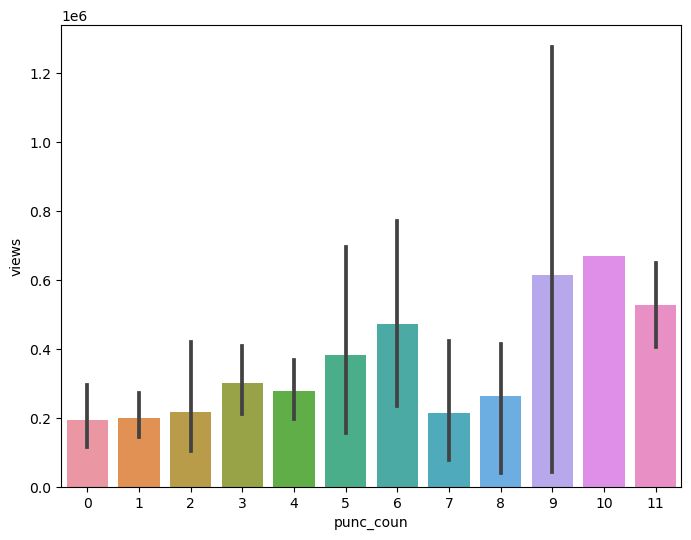

In [127]:
plt.figure(figsize =(8,6))
sns.barplot(x ='punc_coun', y = 'views', data = sample_count)
plt.show()

In [128]:
#ci stick is too long for 9, means confidence interval is larger, 
#means the data is more spread out, basically more outliers, maybe I should draw boxplot

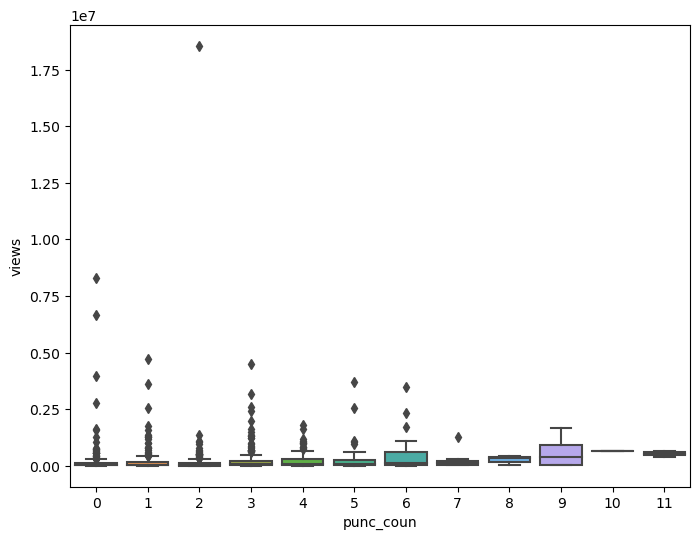

In [129]:
plt.figure(figsize =(8,6))
sns.boxplot(x ='punc_coun', y = 'views', data = sample_count)
plt.show()

In [130]:
#looks like for the 9, not outliers but larger range only

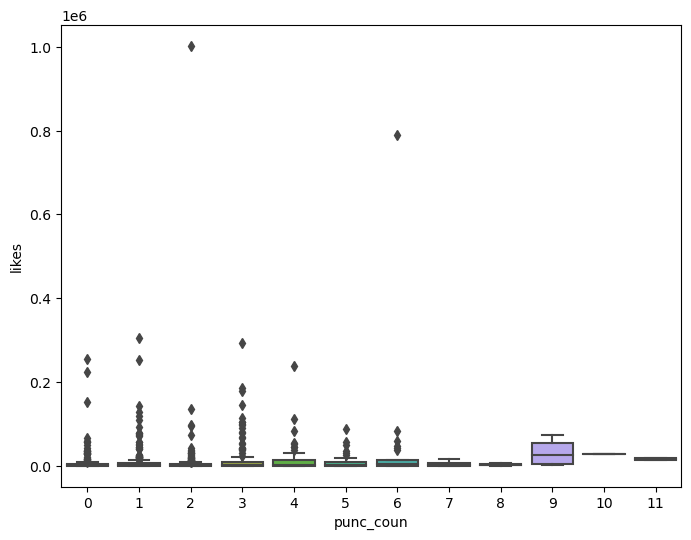

In [131]:
plt.figure(figsize =(8,6))
sns.boxplot(x ='punc_coun', y = 'likes', data = sample_count)
plt.show()

In [132]:
#interesting that punctuations in title lead to more views and likes